In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
N_SAMPLES = 1000
ALPHA = 0.1     # learning rate
EPOCHS = 200

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
X, y = datasets.make_moons(n_samples = N_SAMPLES, shuffle = True, noise = NOISE, random_state = RANDOM_STATE)

X[:5], y[:5]

(array([[ 0.906,  0.903],
        [-1.115,  0.756],
        [ 1.888,  0.418],
        [-0.933, -0.023],
        [-0.969,  0.064]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [5]:
df = pd.DataFrame(X, columns = ['A','B'])

df['target'] = y

df.head()

,A,B,target
0,0.91,0.90,0
1,-1.12,0.76,0
2,1.89,0.42,1
3,-0.93,-0.02,0
4,-0.97,0.06,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,A,B,target
count,1000.00,1000.00,1000.0
mean,0.49,0.24,0.5
std,0.90,0.54,0.5
min,-1.69,-0.96,0.0
25%,-0.15,-0.21,0.0
50%,0.50,0.24,0.5
75%,1.10,0.68,1.0
max,2.42,1.61,1.0


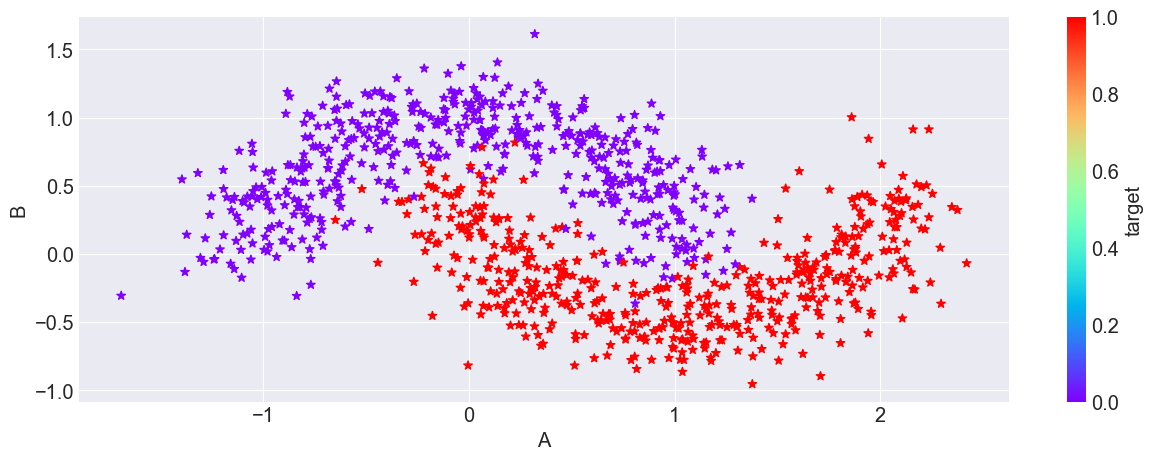

In [8]:
df.plot.scatter('A','B',
               s = 40,
               marker = '*',
               c = 'target',
               cmap = CMAP);

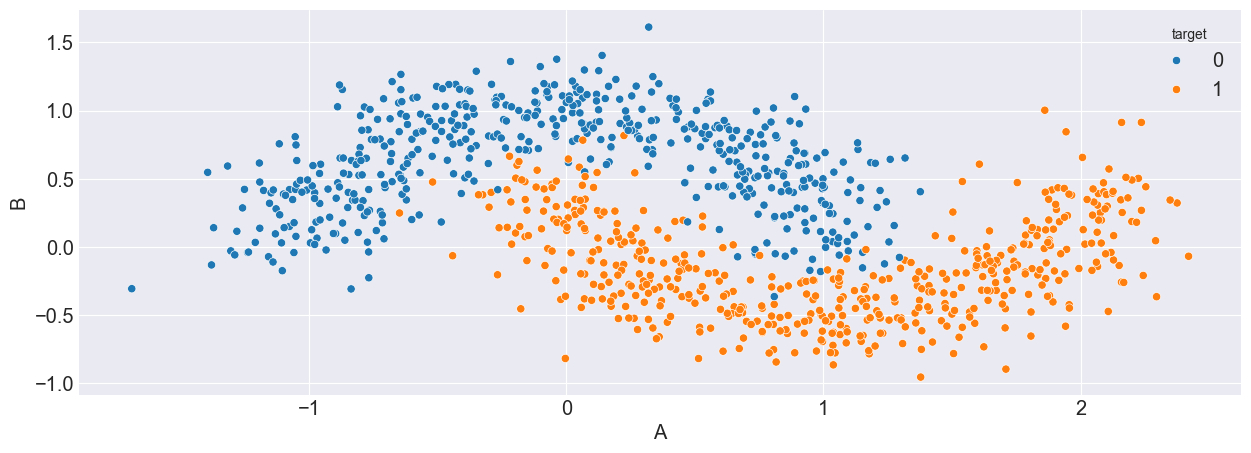

In [9]:
ax = sns.scatterplot(x = 'A', y = 'B',data = df, hue = 'target');

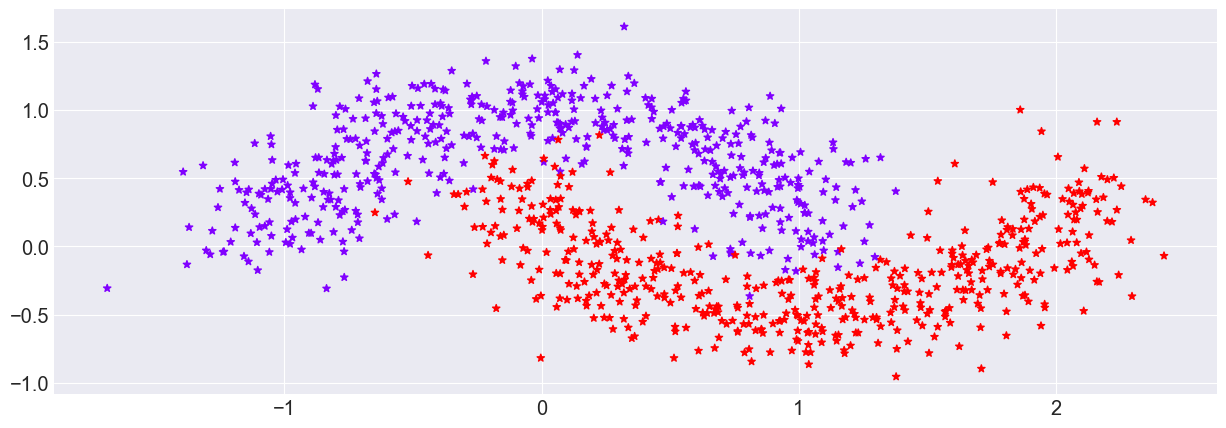

In [10]:
plt.scatter(X[:,0], X[:,1], s = 30 , c = y, marker = '*', cmap = CMAP);

In [11]:
df_train, df_test = df.to_numpy()[:900],df.to_numpy()[900:]

print(df_train.shape, df_test.shape)

(900, 3) (100, 3)


In [12]:
#defining a function for predicition
def predict (row: np.ndarray, weights : np.ndarray) -> np.float64:
    
    
    z = weights[0]
    for i in range(len(row)-1):
        z += weights[i + 1] * row[i]
        
    return 1 if z >= 0 else 0

In [13]:
weights = np.array([0.1, 2.0, 1.0])

display(df.loc[0])

predict(df.loc[0].values, weights)

A         0.91
B         0.90
target    0.00
Name: 0, dtype: float64

1

In [14]:
def train_weights(train : np.ndarray, alpha : np.float64, n_epoch: np.int64):

    errors = []
    
    weights = rng.random(train.shape[1])
    
    m = train.shape[0]
    
    for epoch in range(n_epoch):
        
        sum_error = 0.0
        
        
        for row in train:
            
            prediction = predict(row, weights)
            dz = prediction - row[-1]
            sum_error += (prediction - row[-1])**2
            weights[0] = weights[0] - alpha *dz/m
            
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz*row[i]/m
        errors.append(sum_error / m)
    return errors, weights

In [15]:
errors, weights = train_weights(df_train, ALPHA, EPOCHS)
print(weights)

[-0.  0. -0.]


In [16]:
weights

array([-0.,  0., -0.])

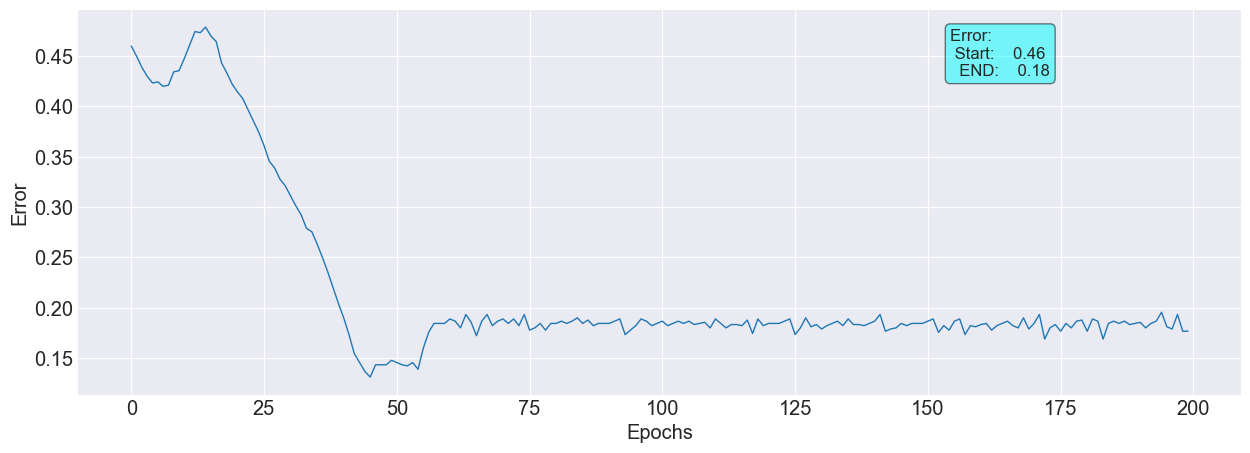

In [17]:
fig, ax = plt.subplots()
ax.plot(errors);

txtstr = "Error: \n Start: {:7.2f}\n  END: {:7.2f}".format(errors[0], errors[-1])

props = dict(boxstyle = 'round', facecolor = 'cyan', alpha = 0.5)

ax.text(0.75, 0.95, txtstr, transform = ax.transAxes, fontsize = 12,
       verticalalignment = 'top', bbox = props)

ax.set_xlabel('Epochs')
ax.set_ylabel("Error");

### Train Set

In [18]:
predictions = []

for row in df_train:
    prediction = predict(row, weights)
    predictions.append(prediction)

In [19]:
accuracy_score(df_train[:,-1], predictions)

0.8311111111111111

### Test Set

In [20]:
predictions = []

for row in df_test:
    prediction = predict(row, weights)
    predictions.append(prediction)

In [21]:
accuracy_score(df_test[:,-1], predictions)

0.89

In [22]:
cm = confusion_matrix(df_test[:,-1], predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

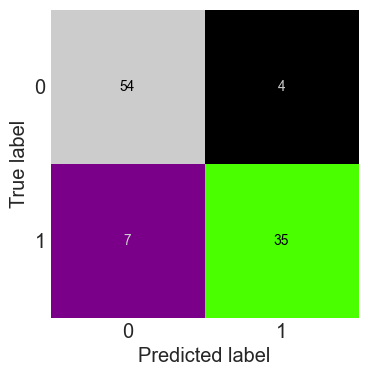

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = [0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'nipy_spectral', colorbar = False)
plt.grid()
plt.show()

### plot decision boundary for assignment

### Also define sigmoid function